Experimento GA.03 - caixeiro com gasolina infinita
========================================



## Introdução




**Considerações do experimento**: Considere um número $n\geq 7$ de coordenadas $(x,y)$ de cidades e que o caixeiro tenha combustível infinito. Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade mais de uma vez.



## Objetivo



Encontrar o caminho de *maior* distância no problema do caixeiro viajante e mostre ele de forma gráfica.




## Importações



Todos os comandos de `import` devem estar dentro desta seção.



In [1]:
import random

import matplotlib.pyplot as plt
import networkx as nx

from itertools import permutations

from funcoes import cria_cidades

from funcoes import populacao_inicial_cv as cria_populacao_inicial
from funcoes import funcao_objetivo_pop_cv
from funcoes import funcao_objetivo_cv
from funcoes import selecao_roleta_max as funcao_selecao # esse já temos!
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao

## Códigos e discussão



Esse experimento trata-se do problema do caixeiro viajante, no entanto, dessa vez, diferentemente do experimento do caixeiro viajante apresentado no experimento 6, esse problema trata-se de um problema de  maximização, pois o objetivo desse caixeiro **muito viajante** é percorrer o maior caminho possível.

No entanto, é preciso atentar-se que mesmo nesse problema ainda há restrições, pois apesar de querer fazer a maior viagem possível, ele não deve passar na mesma cidade mais de uma vez, com exceção da primeira, claro, pois depois de visitar **todas as outras cidades** ele volta para a cidade da qual partiu.

In [2]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
NUM_GERACOES = 1000
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3

# relacionadas ao problema a ser resolvido
NUMERO_DE_CIDADES = 10
CIDADES = cria_cidades(NUMERO_DE_CIDADES)

In [3]:
# Funções locais
def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def funcao_objetivo_individuo(individuo):
    return funcao_objetivo_cv(individuo, CIDADES)

In [4]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, CIDADES)

# Muda
melhor_fitness_ja_visto = -float("inf") 

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador+2
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:
        posicao  = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness

É possível que esse problema é basicamente uma mistura dos experimento 6 e 7. Pois por mais que utilize quase que o mesmo código utilizado no experimento 6, por tratar-se de um problema de maximização foi necessário realizar quase que as mesmas mudanças que realizamos para o experimento 7, como: trocar a função de seleção de `selecao_torneio_min` para `solucao_roleta_max`, a variável `menor_fitness = min(fitness)` para `maior_fitness=max(fitness)`, trocar o sinal $<$ por $>$ , alterar o sinal de melhor fitness visto de + para -, entre outros, todos tendo em vista tratar-se agora de um problema de maximização.

In [5]:
# Busca testando todas as permutações

melhor_fitness_ever = -float("inf")

# testando todas as permutações possíveis 
for caminho in permutations(list(CIDADES.keys())):
    distancia = funcao_objetivo_individuo(caminho)
    if distancia > melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho

O algoritmo de busca exaustiva, sofeu também algumas das alterações já citadas.

In [6]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos")
print(melhor_individuo_ja_visto, "com distancia:", melhor_fitness_ja_visto)

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", melhor_fitness_ever)


Melhor individuo obtido por algoritmos genéticos
['Cidade 9', 'Cidade 4', 'Cidade 5', 'Cidade 3', 'Cidade 0', 'Cidade 1', 'Cidade 2', 'Cidade 7', 'Cidade 8', 'Cidade 6'] com distancia: 6.638259994215604

Melhor individuo obtido por busca exaustiva:
('Cidade 0', 'Cidade 1', 'Cidade 2', 'Cidade 7', 'Cidade 8', 'Cidade 6', 'Cidade 9', 'Cidade 4', 'Cidade 5', 'Cidade 3') com distância: 6.638259994215605


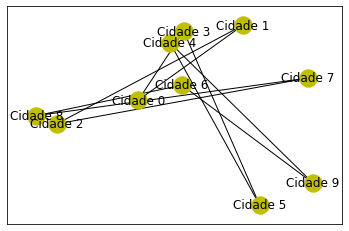

In [12]:
# Representação gráfica 1:
g = nx.Graph()
for i in list(CIDADES.keys()):
    g.add_node(i)
k = -1
while k < len(melhor_individuo_ja_visto)-1:
    g.add_edge(melhor_individuo_ja_visto[k], melhor_individuo_ja_visto[k+1])
    k+=1
vertices = CIDADES.keys()
pos = nx.spring_layout(g,pos=CIDADES, fixed = vertices)
nx.draw_networkx(g,pos,node_color = 'y')

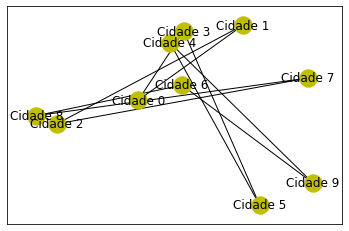

In [13]:
# Representação gráfica:
g = nx.Graph()
for i in list(CIDADES.keys()):
    g.add_node(i)
k = -1
while k < len(melhor_resposta_ever)-1:
    g.add_edge(melhor_resposta_ever[k], melhor_resposta_ever[k+1])
    k+=1
vertices = CIDADES.keys()
pos = nx.spring_layout(g,pos=CIDADES, fixed = vertices)
nx.draw_networkx(g,pos,node_color = 'y')

## Conclusão



Dado que nosso objetivo principal nesse experimento era encontrar o maior caminho possível sem repetir cidades, ele pode ser considerado atingido com sucesso! Isso se dá poque quando comparada com um algoritmo de busca exaustiva, o algoritmo genético teve um desempenho tão bom quanto! Exibindo também o mesmo grafo, no qual os vértices representam as cidades e forma plotadas de acordo com suas coordenadas e as arestas representam o caminho que liga essas cidades.

Com esse desafio, pudemos entender como modificar um problema de minimização para maximização e como isso faz com que seja possível resolver toda uma nova gama de experimentos! 

Com isso o nosso conhecimento sobre algoritmos genéticos e os problemas que podem por eles ficam cada vez mais completos e estou ansiosa para aplicar esses conhecimentos em outros desafios e no trabalho final!&#x1F604;



## Referências consultadas



[1]Material de Lógica Computacional- 1º semestre 2022- Ilum Escola de Ciências

## Playground



Todo código de teste que não faz parte do seu experimento deve vir aqui. Este código não será considerado na avaliação.

